<a href="https://colab.research.google.com/github/Jlok17/2022MSDS/blob/main/Project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Project 1:

For your first project, you are asked to:
1. Identify and load a network dataset that has some categorical information available for each node.
2. For each of the nodes in the dataset, calculate degree centrality and eigenvector centrality.
3. Compare your centrality measures across your categorical groups.

### Data Set:
The Data Set I will be using is about [International Currencies 1890-1910 ](https://eh.net/database/international-currencies-1890-1910/).

A quick overview of this data set is includes 45 different currencies between the period of 1890 and 1910. The reason why this data was collected is that during that period, many national financial centre featured a foreign exchange market where banks traded foreign currency. As these markets were traded against their own domestic currency, this network shows a flow of trade and global market transaction between each nation and their economic power.

### Variables:
* Country_A: The location of the foreign Exchange market
* Country_B: Home country of the currency traded
* Quote1890/Quote1900/Quote1910: Indicates if the market was active for Country B
* Colony: Indicator if Country_A is a colony of Country_B
* Dist: Log distance between cities with foreign exchange markets
* Bitrade: Total trade between Country_A and Country_B in US Dollar(Thousands)
* Gold: If Country_A has a currency convertilbe in gold in 1900
* Debtburden: Ratio of government debt over government revenues in 1900
* Rlong: Secondary Market yield for gold demoninated government debt in 1900
* Rshort1900/Rshort1890: Market rate for 3 month lending
* Rgdp: Log 1900 real GDP
* Rgdpcap: Log real GDP per Capita
* Poldemo: Index of democracy of Polyarchy dataset
* Coverage: Logarithm of the number of currencies traded in Country_A

**1.   Following Variables are Repeated ones from Above but for Country_B**

* Gold_B
* Debtburden_B
* Rlong_B
* Rshort1900_B
* Rshort1890_B
* Rgdp_B
* Rgdpcap_B

### Centrality Measures

* Degree Centrality: Measures the number of direct connections each node has within the network.

* Closeness Centrality: Calculates the shortest paths between all nodes and assigns each node a score based on the sum of its distances to all other nodes.

* Betweenness Centrality: Identifies the nodes that act as "bridges" or intermediaries between other nodes in the network.

* PageRank: Reveals different nodes that possess influence beyond their direct connections.

* EigenCentrality: Examines the extended connections of a node to identify the node's influence over the network.


In [51]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [52]:
df = pd.read_csv('https://raw.githubusercontent.com/Jlok17/Data620/main/DataSources/updatedinternationalcurrencies_data.txt', delimiter=',')
df.to_csv('international_currencies_data.csv', index=False)

In [53]:
df.head

<bound method NDFrame.head of      country_A  country_B   quote1890   quote1900   quote1910   colony   \
0          ARG        AUH            0           0           0        0   
1          ARG        AUS            0           0           0        0   
2          ARG        BEL            1           1           1        0   
3          ARG        BRA            0           1           1        0   
4          ARG        CAN            0           0           0        0   
...         ...        ...         ...         ...         ...      ...   
1975       VEN        SGP            0           0           0        0   
1976       VEN        SIA            0           0           0        0   
1977       VEN        SWE            0           0           0        0   
1978       VEN        URY            0           0           0        0   
1979       VEN        USA            0           0           0        0   

         dist    bitrade   gold  debtburden   ... poldemo  coverage  

In [54]:
column_names = df.columns
print(column_names)

Index(['country_A ', 'country_B ', 'quote1890 ', 'quote1900 ', 'quote1910 ',
       'colony ', 'dist ', 'bitrade ', 'gold ', 'debtburden ', 'rlong ',
       'rshort1900 ', 'rshort1890 ', 'rgdp ', 'rgdpcap ', 'poldemo ',
       'coverage ', 'gold_B ', 'debtburden_B ', 'rlong_B ', 'rshort1900_B ',
       'rshort1890_B ', 'rgdp_B ', 'rgdpcap_B ', 'poldemo_B'],
      dtype='object')


In [55]:
country_A_values = df['country_A ']
country_B_values = df['country_B ']
BiTrade_values = df['bitrade ']
print(country_A_values.head(10), country_B_values.head(10),BiTrade_values.head(10))

0    ARG 
1    ARG 
2    ARG 
3    ARG 
4    ARG 
5    ARG 
6    ARG 
7    ARG 
8    ARG 
9    ARG 
Name: country_A , dtype: object 0    AUH 
1    AUS 
2    BEL 
3    BRA 
4    CAN 
5    CEY 
6    CHE 
7    CHL 
8    CHN 
9    COL 
Name: country_B , dtype: object 0      5909.76
1      1258.74
2    127361.20
3     65335.41
4      5073.84
5         0.00
6     16823.72
7      4928.04
8         0.00
9         0.00
Name: bitrade , dtype: float64


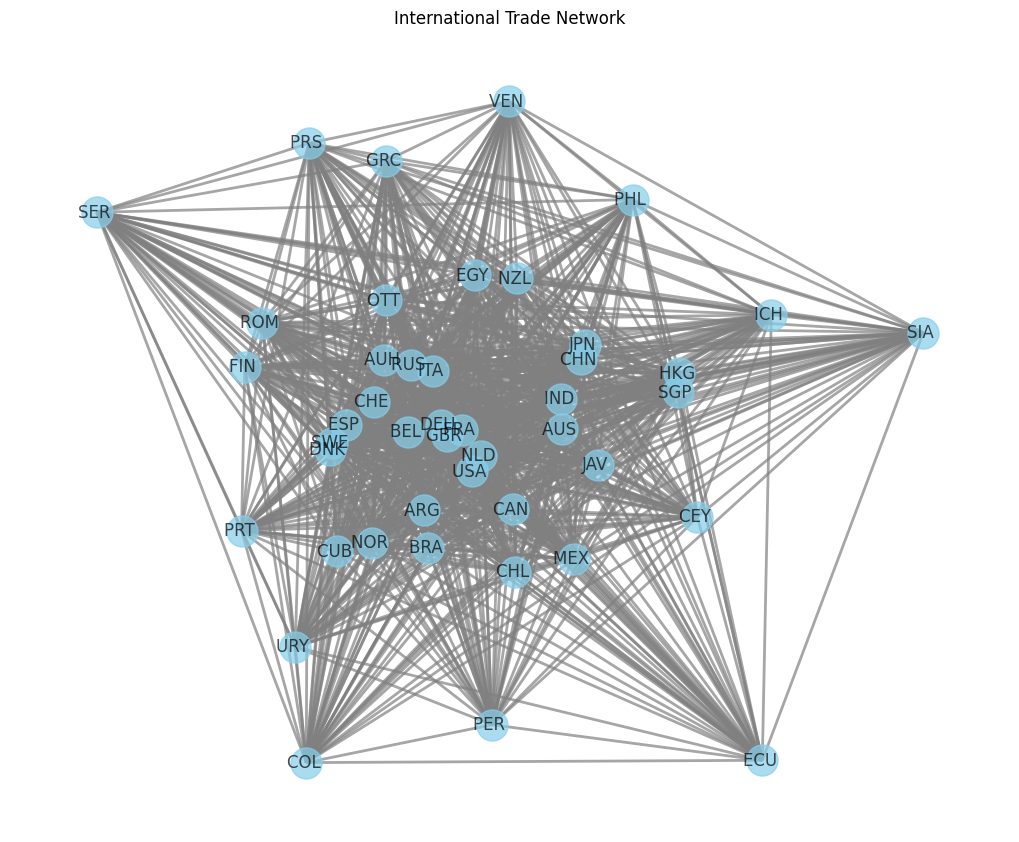

In [56]:
G = nx.Graph()

for row in df.iterrows():
    country1 = row[1]['country_A ']
    country2 = row[1]['country_B ']
    trade = row[1]['bitrade ']

    G.add_edge(country1, country2, weight=trade)

plt.figure(figsize=(10, 8))
pos = nx.fruchterman_reingold_layout(G, k = 0.8)
nx.draw(G, pos, with_labels= True , node_color='skyblue', node_size=500, edge_color='gray', width=2, alpha=0.7)
edge_labels = nx.get_edge_attributes(G, 'weight')
plt.title('International Trade Network')
plt.show()

In [57]:
print("Number of nodes:", G.number_of_nodes())
print("Number of edges:", G.number_of_edges())

Number of nodes: 45
Number of edges: 990


In [60]:
countries_set = set()

for row in df.iterrows():
    country1 = row[1]['country_A '].strip()
    country2 = row[1]['country_B '].strip()
    trade = row[1]['bitrade ']

    countries_set.add(country1)
    countries_set.add(country2)
    G.add_edge(country1, country2, weight=trade)

weighted_degrees = dict(G.degree(weight='weight'))
weighted_degrees = {node: round(weighted_degrees[node], 3) for node in weighted_degrees}

sorted_nodes = sorted(weighted_degrees, key=lambda x: weighted_degrees[x], reverse=True)

print("Top 5 Nodes By Weighted Degree:")
count = 0
for node in sorted_nodes:
    if node in countries_set:
        print(f"Node: {node}, Weighted Degree: {weighted_degrees[node]}")
        count += 1
    if count == 5:
        break

print("\nBottom 5 Nodes By Weighted Degree:")
count = 0
for node in reversed(sorted_nodes):
    if node in countries_set:
        print(f"Node: {node}, Weighted Degree: {weighted_degrees[node]}")
        count += 1
    if count == 5:
        break


Top 5 Nodes By Weighted Degree:
Node: GBR, Weighted Degree: 18639174.8
Node: DEU, Weighted Degree: 12142509.995
Node: USA, Weighted Degree: 10843605.263
Node: FRA, Weighted Degree: 7059334.57
Node: NLD, Weighted Degree: 5337034.289

Bottom 5 Nodes By Weighted Degree:
Node: ECU, Weighted Degree: 60419.307
Node: COL, Weighted Degree: 89259.891
Node: SER, Weighted Degree: 107459.797
Node: VEN, Weighted Degree: 117008.901
Node: SIA, Weighted Degree: 137300.225


The Weighted Degree is

> Indented block
n the context of network analysis, the weighted degree of a node refers to the sum of the weights of its incident edges.

In the given code snippet, the graph G is constructed with edges representing the relationships between countries, and the weight of each edge represents the trade value (bitrade) between the corresponding countries.

When calculating the weighted degree of a node, the algorithm considers the weights of all the edges connected to that node. It sums up the weights of these edges to determine the weighted degree of the node.

So, in this case, the weighted degree of a country node represents the total trade value (sum of bitrade) associated with that country in the network. It provides an indication of how connected and influential a country is in terms of international trade.


In [61]:
edge_data = []

for row in df.iterrows():
    country_A = row[1]['country_A ']
    country_B = row[1]['country_B ']
    gold_A = row[1]['gold ']
    gold_B = row[1]['gold_B ']
    bitrade = row[1]['bitrade ']

    if gold_A and gold_B:
        weight = 3
    elif gold_A or gold_B:
        weight = 2
    else:
        weight = 1

    edge_data.append((country_A, country_B, weight, bitrade))

# Create a DataFrame from the edge data
edge_df = pd.DataFrame(edge_data, columns=['Country_A', 'Country_B', 'Weight', 'Bitrade'])
#Taking out all values of 0 since those Trade Values are unreported
edge_df = edge_df[edge_df['Bitrade'] != 0]

In [65]:
edge_df.head(5)

,Country_A,Country_B,Weight,Bitrade
0,ARG,AUH,3,5909.76
1,ARG,AUS,3,1258.74
2,ARG,BEL,3,127361.20
3,ARG,BRA,2,65335.41
4,ARG,CAN,3,5073.84


In [63]:
summary_stats = edge_df.groupby('Weight')['Bitrade'].describe()

# Rename the index for better readability
summary_stats.index = ['Weight 1', 'Weight 2', 'Weight 3']

# Print the summary statistics
print(summary_stats)

          count           mean            std        min       25%        50%  \
Weight 1  130.0   26246.422252   76336.653544  126.36000   986.580   4660.740   
Weight 2  526.0   40100.873287   80476.439132   19.44000  1254.933   7858.620   
Weight 3  452.0  158749.403129  380793.433389   65.92667  3858.840  27207.605   

                 75%        max  
Weight 1   17880.350   566778.1  
Weight 2   35119.575   456125.6  
Weight 3  114234.300  3545484.0  


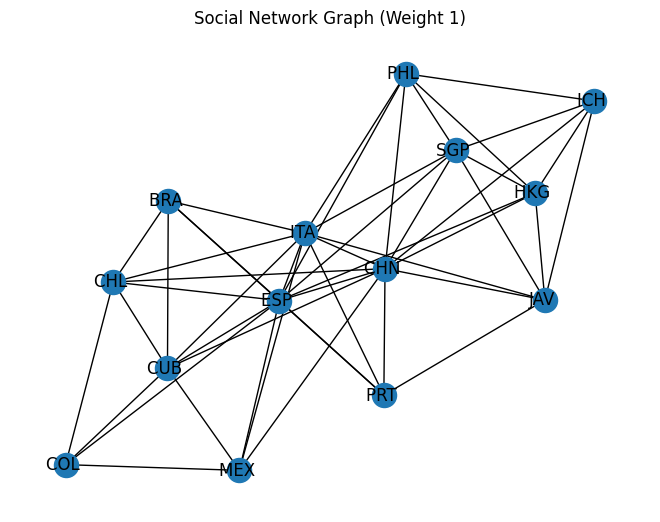


Weight 1:
Top 6 values of degree centrality:
CHN : 0.8461538461538463
ESP : 0.8461538461538463
ITA : 0.7692307692307693
SGP : 0.5384615384615385
CUB : 0.5384615384615385
JAV : 0.46153846153846156

Bottom 5 values of degree centrality:
COL : 0.3076923076923077
BRA : 0.38461538461538464
ICH : 0.38461538461538464
MEX : 0.38461538461538464
PRT : 0.38461538461538464
JAV : 0.46153846153846156

Top 5 values of eigenvector centrality:
CHN : 0.3914131186187577
ESP : 0.38330910925841566
ITA : 0.36441133330923176
SGP : 0.279390258296436
CUB : 0.26537127616912776
PHL : 0.25188829934583273

Bottom 5 values of eigenvector centrality:
COL : 0.15042173741074452
ICH : 0.18951113043991616
BRA : 0.20046144849542796
MEX : 0.21244571010910018
PRT : 0.214284779189536
JAV : 0.22879490854591553


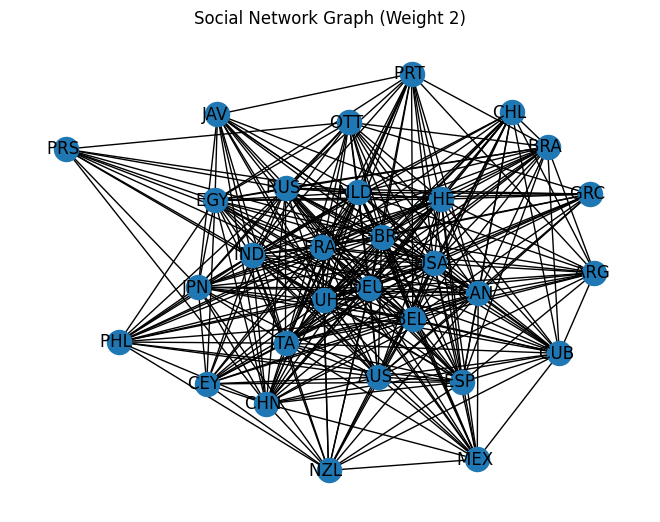


Weight 2:
Top 6 values of degree centrality:
AUH : 1.0
DEU : 1.0
FRA : 1.0
GBR : 1.0
BEL : 0.9655172413793103
ITA : 0.9655172413793103

Bottom 5 values of degree centrality:
PRS : 0.3793103448275862
GRC : 0.48275862068965514
ARG : 0.5517241379310345
JAV : 0.5517241379310345
CHL : 0.5862068965517241
CEY : 0.5862068965517241

Top 5 values of eigenvector centrality:
FRA : 0.2214644407573955
GBR : 0.2214644407573955
AUH : 0.22146444075739546
DEU : 0.22146444075739546
ITA : 0.21755462305934276
USA : 0.21755462305934276

Bottom 5 values of eigenvector centrality:
PRS : 0.09493652486833919
GRC : 0.12387678435184489
ARG : 0.13681814410182927
JAV : 0.140391753914263
NZL : 0.14293051544092417
CHL : 0.14702502971364767


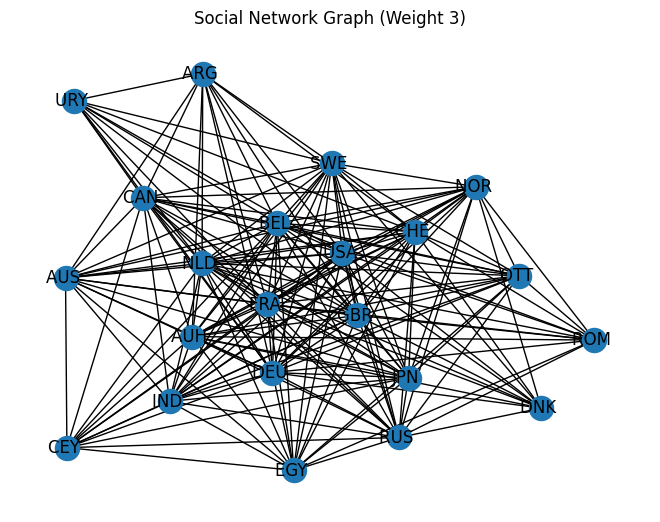


Weight 3:
Top 6 values of degree centrality:
BEL : 1.0
GBR : 1.0
USA : 1.0
FRA : 1.0
DEU : 1.0
NLD : 1.0

Bottom 5 values of degree centrality:
URY : 0.47619047619047616
DNK : 0.5238095238095237
ROM : 0.5714285714285714
ARG : 0.5714285714285714
CEY : 0.6190476190476191
AUS : 0.7619047619047619

Top 5 values of eigenvector centrality:
NLD : 0.24617196049974885
BEL : 0.2461719604997488
GBR : 0.2461719604997488
USA : 0.2461719604997488
FRA : 0.2461719604997488
DEU : 0.2461719604997488

Bottom 5 values of eigenvector centrality:
URY : 0.13025681615053786
DNK : 0.14701956060976765
ARG : 0.15366935929885933
ROM : 0.15686258186848664
CEY : 0.16795699398077288
EGY : 0.20028976153293115


In [71]:
# Create an empty graph
G = nx.Graph()

# Iterate over the rows of the DataFrame
for row in edge_df.iterrows():
    country_A = row[1]['Country_A']
    country_B = row[1]['Country_B']
    weight = row[1]['Weight']

    # Add nodes
    G.add_node(country_A)
    G.add_node(country_B)

    # Add edges based on weight
    if weight == 1:
        G.add_edge(country_A, country_B, weight=weight)
    elif weight == 2:
        G.add_edge(country_A, country_B, weight=weight)
    elif weight == 3:
        G.add_edge(country_A, country_B, weight=weight)

# Plot separate graphs based on weight
weights = [1, 2, 3]
for weight in weights:
    subgraph = G.subgraph([n for n, _, w in G.edges(data='weight') if w == weight])
    nx.draw(subgraph, with_labels=True)
    plt.title(f"Social Network Graph (Weight {weight})")
    plt.show()

    # Calculate degree centrality for the subgraph
    degree_centrality = nx.degree_centrality(subgraph)

    # Calculate eigenvector centrality for the subgraph
    eigenvector_centrality = nx.eigenvector_centrality(subgraph)

    # Get the top 5 and bottom 5 values of degree centrality
    top_degree_centrality = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:6]
    bottom_degree_centrality = sorted(degree_centrality.items(), key=lambda x: x[1])[:6]

    # Get the top 5 and bottom 5 values of eigenvector centrality
    top_eigenvector_centrality = sorted(eigenvector_centrality.items(), key=lambda x: x[1], reverse=True)[:6]
    bottom_eigenvector_centrality = sorted(eigenvector_centrality.items(), key=lambda x: x[1])[:6]

    # Print the results for the current weight
    print(f"\nWeight {weight}:")

    print("Top 6 values of degree centrality:")
    for node, centrality in top_degree_centrality:
        print(f"{node}: {centrality}")

    print("\nBottom 5 values of degree centrality:")
    for node, centrality in bottom_degree_centrality:
        print(f"{node}: {centrality}")

    print("\nTop 5 values of eigenvector centrality:")
    for node, centrality in top_eigenvector_centrality:
        print(f"{node}: {centrality}")

    print("\nBottom 5 values of eigenvector centrality:")
    for node, centrality in bottom_eigenvector_centrality:
        print(f"{node}: {centrality}")

#### References:

Flandreau, M. and C. Jobst (2005), ‘The ties that divide: a network analysis of the international monetary system 1890–1910’, Journal of Economic History, vol. 65(4).
